# Imports

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
pip install kaggle --upgrade

#Dataset

In [3]:
os.environ['KAGGLE_USERNAME'] = "username"
os.environ['KAGGLE_KEY'] = "key"

In [4]:
#https://www.kaggle.com/pmigdal/alien-vs-predator-images
!kaggle datasets download pmigdal/alien-vs-predator-images

#path = os.path.join(os.path.dirname(path_to_file), 'cats_and_dogs_filtered')

 64% 9.00M/14.1M [00:00<00:00, 40.1MB/s]
100% 14.1M/14.1M [00:00<00:00, 59.0MB/s]


In [5]:
!unzip -o 'alien-vs-predator-images.zip'

Archive:  alien-vs-predator-images.zip
  inflating: alien_vs_predator_thumbnails/data/train/alien/0.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/1.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/10.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/100.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/101.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/102.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/103.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/104.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/105.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/106.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/107.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/108.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/109.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/11.jpg  
 

In [6]:
os.listdir()

['.config',
 'alien-vs-predator-images.zip',
 'data',
 'alien_vs_predator_thumbnails',
 'sample_data']

In [8]:
##path = os.path.join()

TypeError: ignored

In [9]:
## Obtain data from os
train_dir = os.path.join('data', 'train')
validation_dir = os.path.join('data', 'validation')

train_alien_dir = os.path.join(train_dir, 'alien')  
train_predator_dir = os.path.join(train_dir, 'predator')  
validation_alien_dir = os.path.join(validation_dir, 'alien') 
validation_predator_dir = os.path.join(validation_dir, 'predator')  

In [10]:
## Print info from data
num_alien_tr = len(os.listdir(train_alien_dir))
num_predator_tr = len(os.listdir(train_predator_dir))

num_alien_val = len(os.listdir(validation_alien_dir))
num_predator_val = len(os.listdir(validation_predator_dir))

total_train = num_alien_tr + num_predator_tr
total_val = num_alien_val + num_predator_val

print('total training alien images:', num_alien_tr)
print('total training predator images:', num_predator_tr)

print('total validation alien images:', num_alien_val)
print('total validation predator images:', num_predator_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training alien images: 347
total training predator images: 347
total validation alien images: 100
total validation predator images: 100
Total training images: 694
Total validation images: 200


In [11]:
epochs = 15
batch_size = 128
IMAGE_SIZE = (250, 250)
CLASS_NAMES = ['alien','predator']

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [13]:
#train

NameError: ignored

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 694 images belonging to 2 classes.


In [15]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 200 images belonging to 2 classes.


In [16]:
training_batch, labels_batch = next(train_data_gen)
training_batch.shape, labels_batch.shape

((128, 250, 250, 3), (128,))

In [17]:
def plot_images(img_batch, labels=None):
  range_count = 15 if len(img_batch) > 15 else len(img_batch)
  plt.figure(figsize=(12,12))
  for i in range(range_count):
    plt.subplot(4,5,i+1) 
    plt.imshow(img_batch[i])
    if (labels is not None):
      plt.title(CLASS_NAMES[np.int(labels[i])]) 
    plt.axis('off')

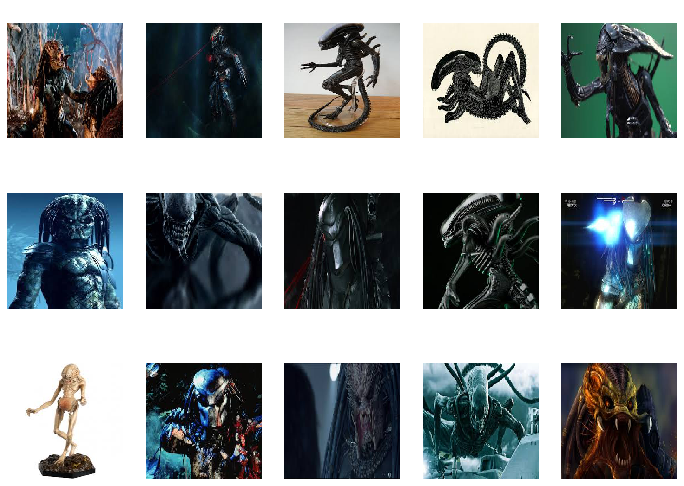

In [ ]:
plot_images(training_batch, labels_batch)

#Fully connected neural netowrk

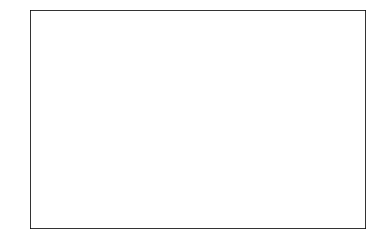

In [18]:
def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

#fit?
def train(m, train_data=train_data_gen, epochs=epochs):
  return m.fit(
            train_data,
            steps_per_epoch=total_train // batch_size,
            epochs=epochs,
            validation_data=val_data_gen,
            validation_steps=total_val // batch_size
          )

In [19]:
model = Sequential([
  Flatten(input_shape=IMAGE_SIZE+(3,)),
  Dense(1024, activation='tanh'),
  Dense(512, activation='tanh'),
  Dense(1, activation='sigmoid')
])

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 187500)            0         
                                                                 
 dense (Dense)               (None, 1024)              192001024 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 192,526,337
Trainable params: 192,526,337
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
5/5 [==============================] - 8s 1s/step - loss: 3.4129 - accuracy: 0.5124 - val_loss: 0.7070 - val_accuracy: 0.5078
Epoch 2/15
5/5 [==============================] - 6s 1s/step - loss: 0.7679 - accuracy: 0.5194 - val_loss: 0.6956 - val_accuracy: 0.4688
Epoch 3/15
5/5 [==============================] - 7s 1s/step - loss: 0.7145 - accuracy: 0.5109 - val_loss: 0.7084 - val_accuracy: 0.4844
Epoch 4/15
5/5 [==============================] - 6s 1s/step - loss: 0.6935 - accuracy: 0.5177 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 0.6902 - accuracy: 0.5230 - val_loss: 0.6905 - val_accuracy: 0.4844
Epoch 6/15
5/5 [==============================] - 7s 1s/step - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4688
Epoch 7/15
5/5 [==============================] - 7s 1s/step - loss: 0.6868 - accuracy: 0.5500 - val_loss: 0.6839 - val_accuracy: 0.6016
Epoch 8/15
5/5 [=========================

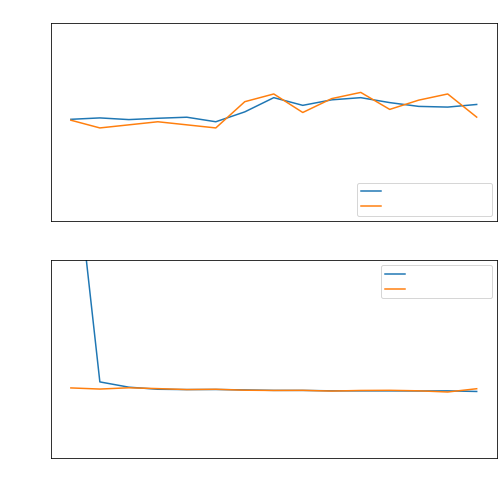

In [22]:
history = train(model)
plot_accuracy_and_loss(history)

#ConvNet

##Convolution

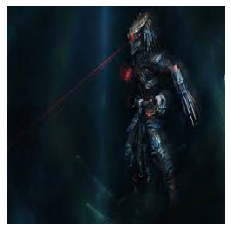

In [23]:
img = training_batch[1]
plt.axis('off')
plt.imshow(img)


In [24]:
#what
def plot_filters(layer):
    filters = layer.shape[3]

    columns = 8
    #rows = ((filters-1) // columns) + 1
    plt.figure(figsize=(20,20))    
    for i in range(filters):
      plt.subplot(columns, columns, i+1)
      plt.title('Filter ' + str(i), color='white')
      plt.axis('off')
      plt.imshow(layer[0,:,:,i], interpolation="nearest", cmap="gray")

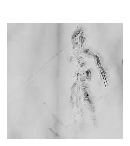

In [25]:
conv = Conv2D(1, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

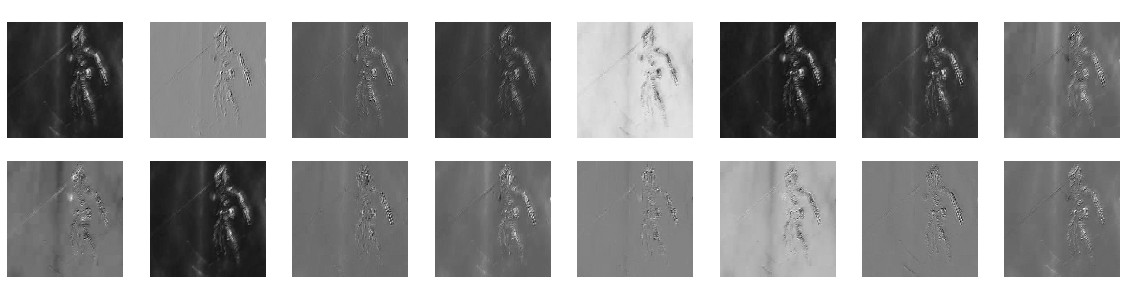

In [26]:
conv = Conv2D(16, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

##ConvModel

In [27]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 128)     

In [29]:
def plot_model_filters(layers, img):
  input = tf.expand_dims(img, 0)
  for filter_layer in layers:
    output = filter_layer(input)    
    input = output
    print(filter_layer)
    plot_filters(output.numpy())
  return


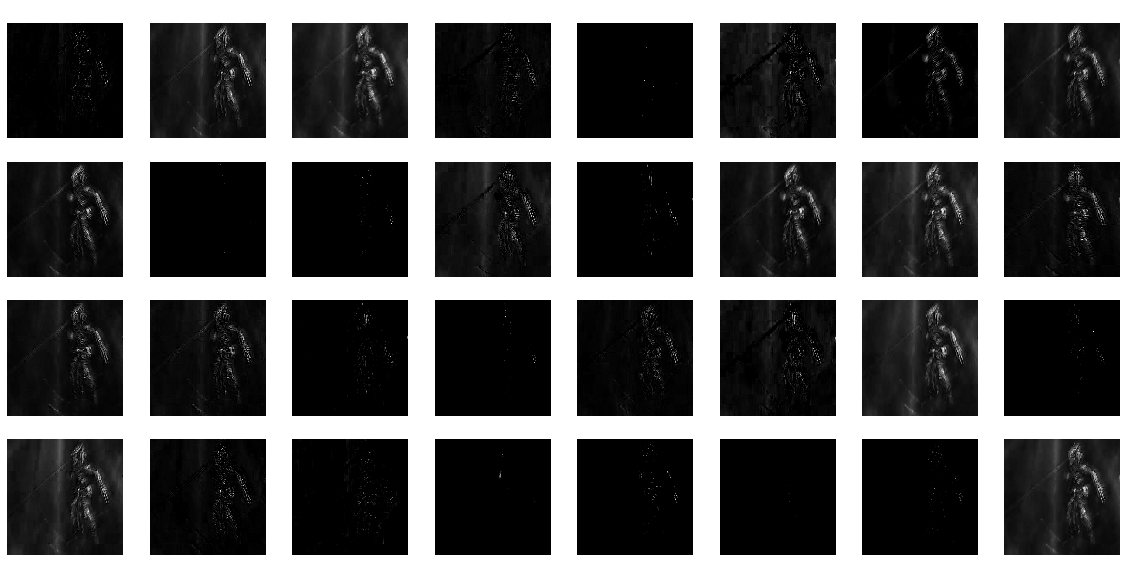

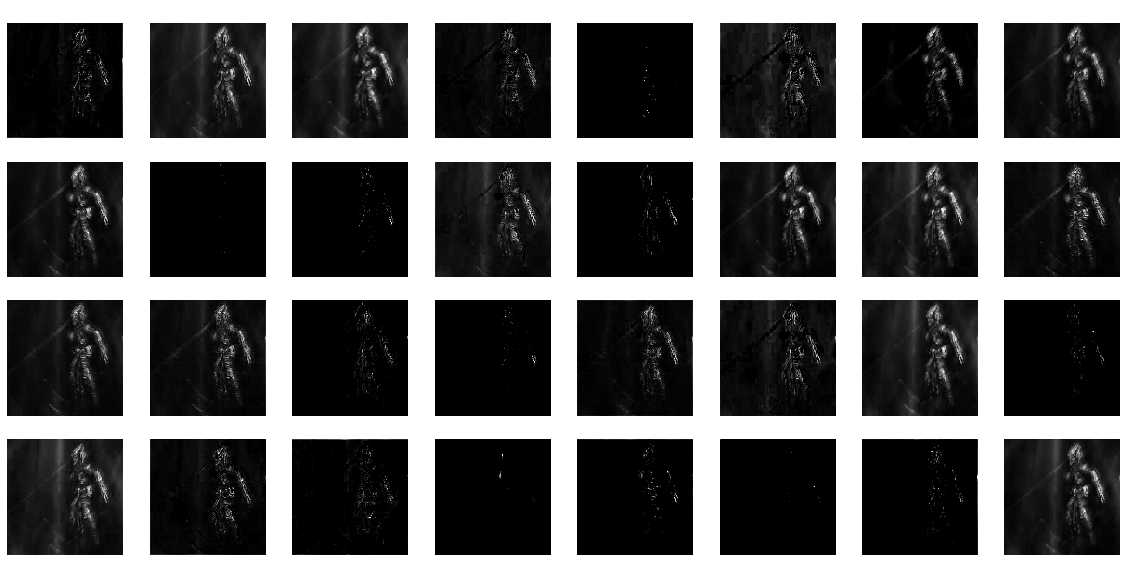

In [30]:
plot_model_filters(model.layers[:2], img)

Epoch 1/15
5/5 [==============================] - 44s 9s/step - loss: 1.7624 - accuracy: 0.5078 - val_loss: 0.6929 - val_accuracy: 0.5078
Epoch 2/15
5/5 [==============================] - 38s 7s/step - loss: 0.6834 - accuracy: 0.5671 - val_loss: 0.6675 - val_accuracy: 0.5312
Epoch 3/15
5/5 [==============================] - 38s 9s/step - loss: 0.6948 - accuracy: 0.5194 - val_loss: 0.6276 - val_accuracy: 0.6641
Epoch 4/15
5/5 [==============================] - 40s 8s/step - loss: 0.6403 - accuracy: 0.6396 - val_loss: 0.6749 - val_accuracy: 0.5234
Epoch 5/15
5/5 [==============================] - 38s 7s/step - loss: 0.6096 - accuracy: 0.6449 - val_loss: 0.6079 - val_accuracy: 0.6641
Epoch 6/15
5/5 [==============================] - 38s 7s/step - loss: 0.5782 - accuracy: 0.6784 - val_loss: 0.6638 - val_accuracy: 0.5938
Epoch 7/15
5/5 [==============================] - 38s 9s/step - loss: 0.5026 - accuracy: 0.7862 - val_loss: 0.5540 - val_accuracy: 0.7031
Epoch 8/15
5/5 [==================

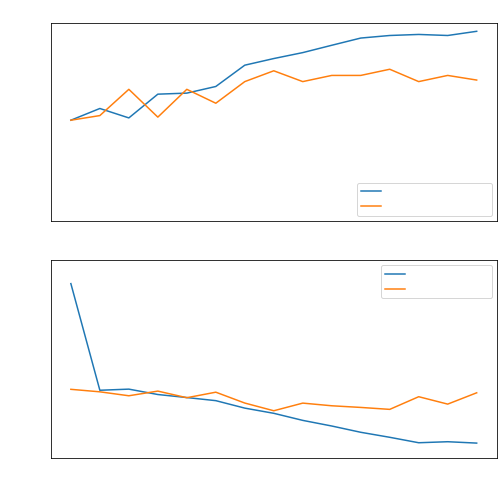

In [31]:
history = train(model)
plot_accuracy_and_loss(history)

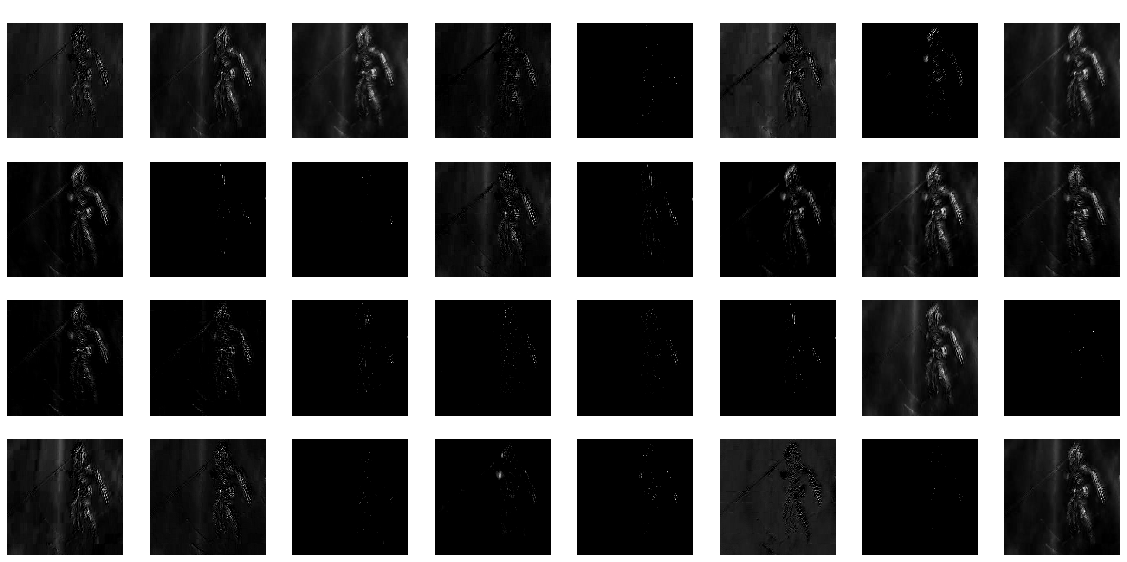

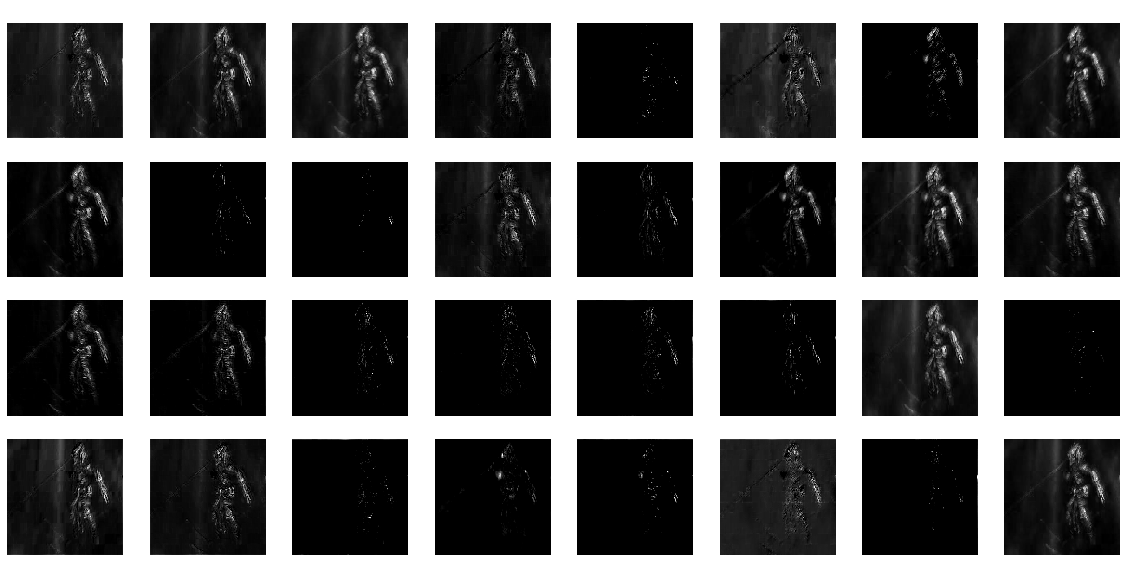

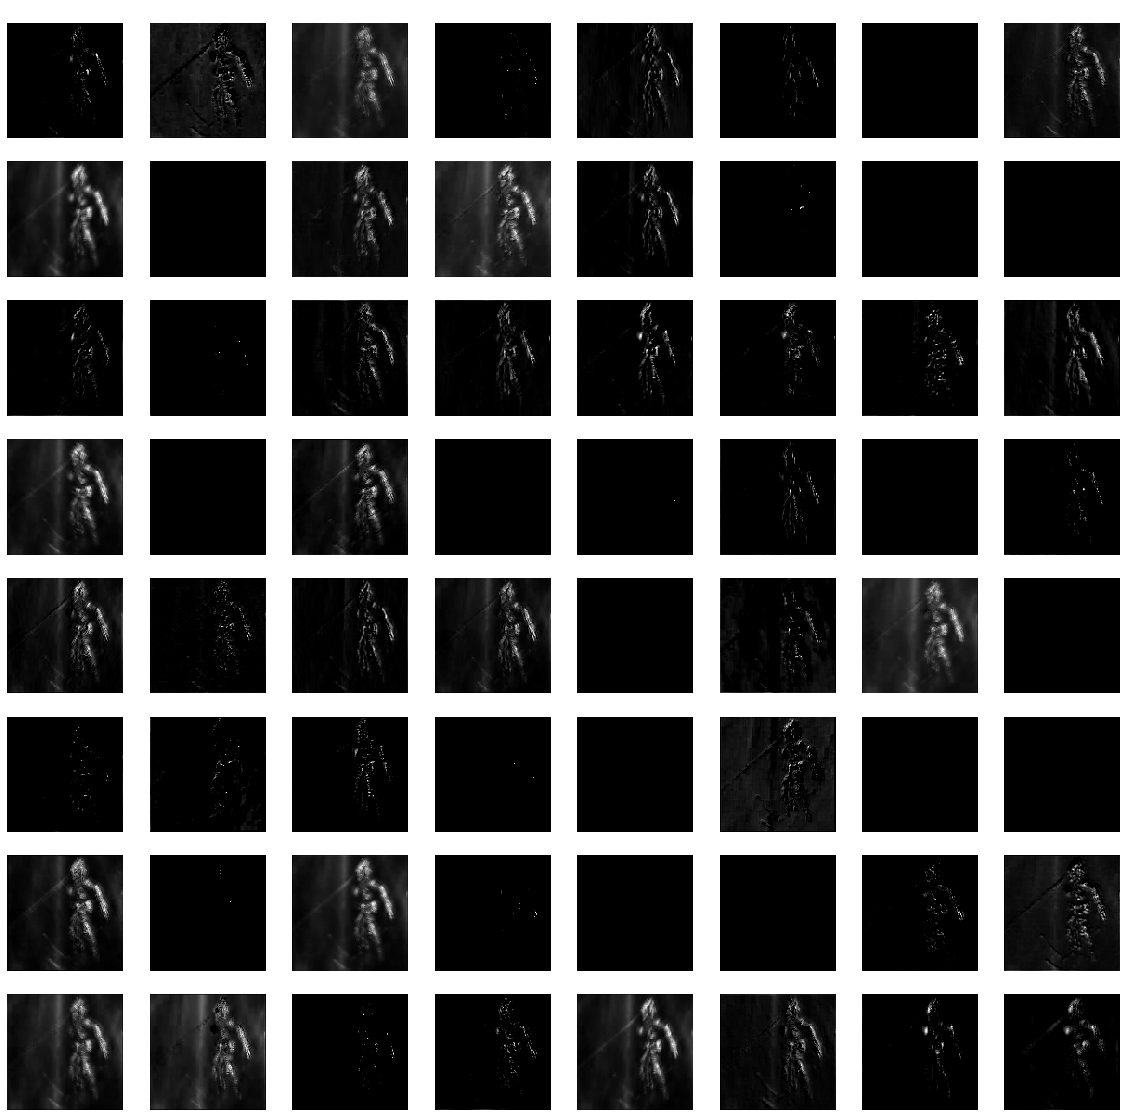

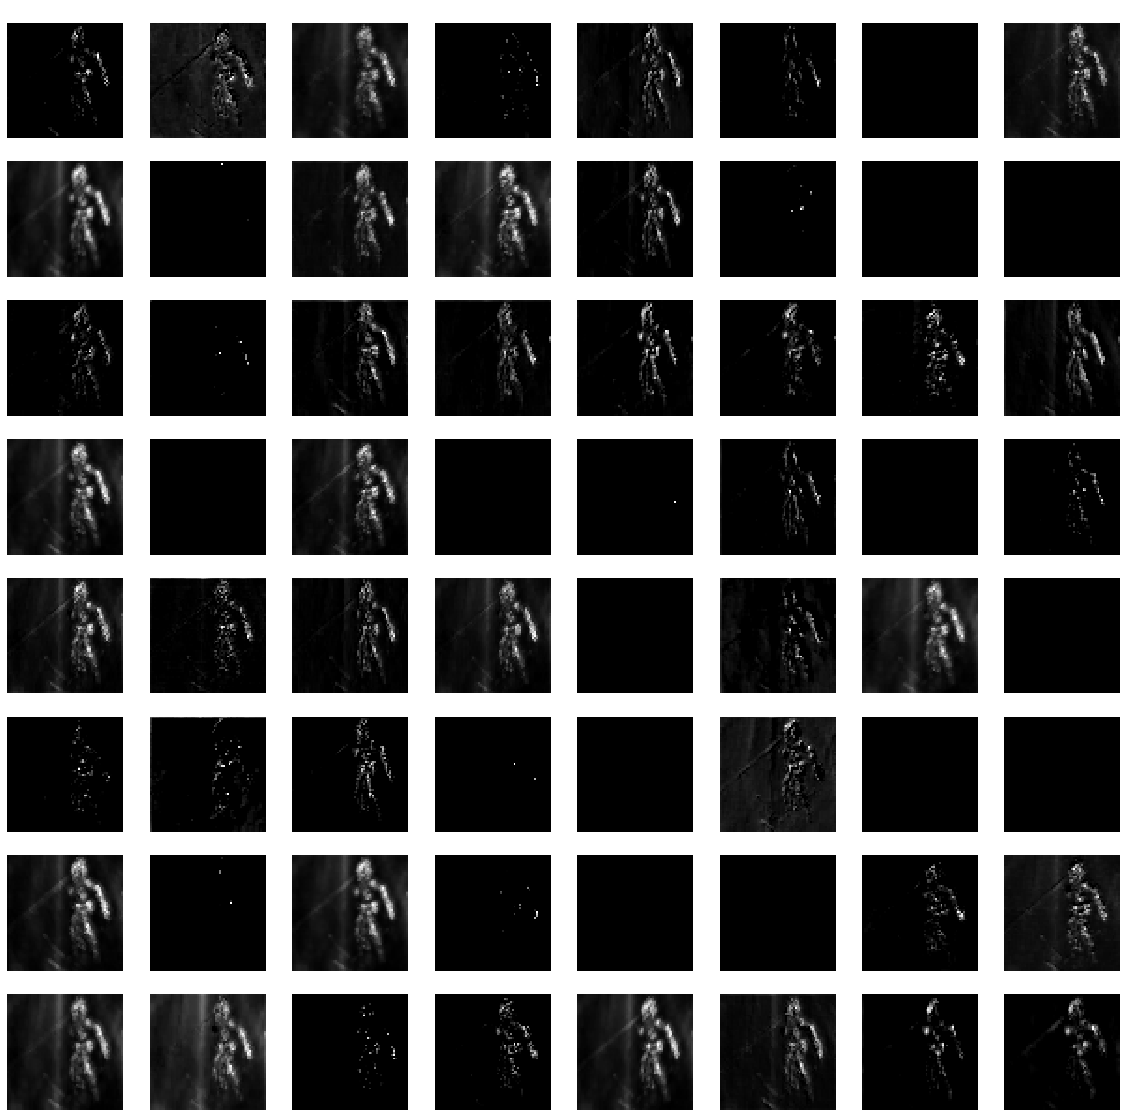

In [32]:
plot_model_filters(model.layers[:4], img)

#Overfitting

##Dropout

In [33]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [34]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 128)     

In [35]:
history = train(model, train_data_gen)


Epoch 1/15
5/5 [==============================] - 42s 8s/step - loss: 2.0916 - accuracy: 0.5035 - val_loss: 0.6925 - val_accuracy: 0.4922
Epoch 2/15
5/5 [==============================] - 38s 9s/step - loss: 0.7148 - accuracy: 0.4947 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 3/15
5/5 [==============================] - 42s 9s/step - loss: 0.6765 - accuracy: 0.5531 - val_loss: 0.6516 - val_accuracy: 0.6406
Epoch 4/15
5/5 [==============================] - 38s 7s/step - loss: 0.6437 - accuracy: 0.6449 - val_loss: 0.6315 - val_accuracy: 0.6250
Epoch 5/15
5/5 [==============================] - 38s 7s/step - loss: 0.6332 - accuracy: 0.6237 - val_loss: 0.6245 - val_accuracy: 0.6328
Epoch 6/15
5/5 [==============================] - 38s 7s/step - loss: 0.5938 - accuracy: 0.6943 - val_loss: 0.6068 - val_accuracy: 0.6250
Epoch 7/15
5/5 [==============================] - 38s 7s/step - loss: 0.5411 - accuracy: 0.7350 - val_loss: 0.5927 - val_accuracy: 0.6797
Epoch 8/15
5/5 [==================

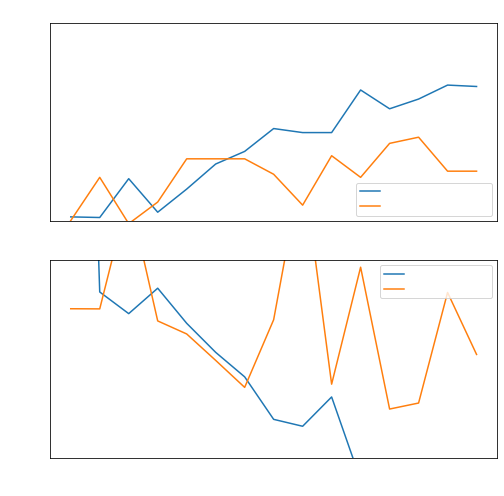

In [ ]:
plot_accuracy_and_loss(history, acc_ylim=[0.5,1.0],loss_ylim=[0.5,0.75])

##Data augmentation

Found 694 images belonging to 2 classes.


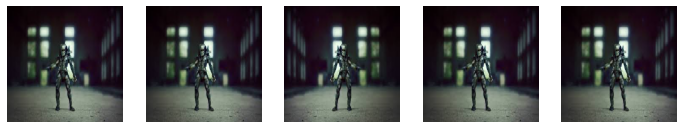

In [36]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 694 images belonging to 2 classes.


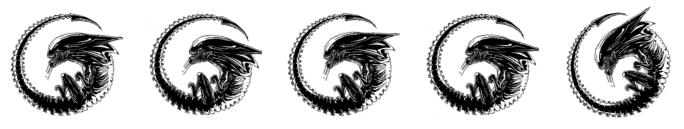

In [37]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 694 images belonging to 2 classes.


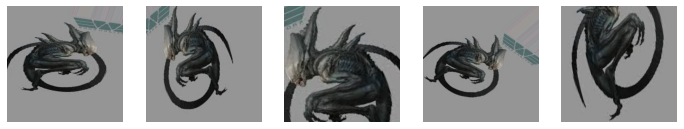

In [38]:
augmented_image_gen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=45,
                                width_shift_range=.15,
                                height_shift_range=.15,
                                horizontal_flip=True,
                                zoom_range=0.5
                                )

augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 128)     

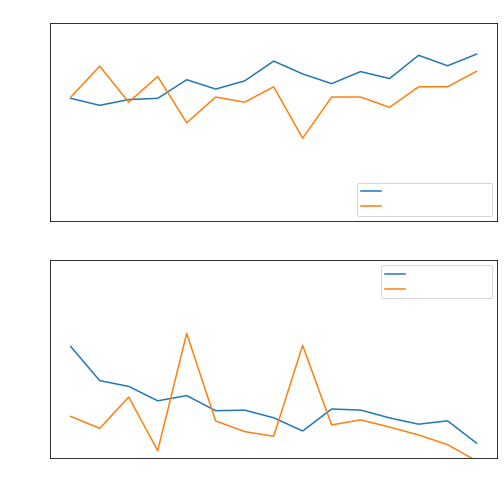

In [39]:
model.summary()
history = train(model, augmented_train_data_gen)
plot_accuracy_and_loss(history, acc_ylim=[0.5,0.8],loss_ylim=[0.5,0.75])